## computer vision library

* `torchvision` -> base domain library for pytorch computer vison
* `torchvision.dataset` -> get dataset and dataloading fn for computer vison
* `torchvision.models`  -> get pretrained vison models
* `torchvision.transform`  -> fn for manipulating your vison data(image) to be suitable for use with ML model
* `torch.utils.data.Dataset` -> base dataset class for pytorch
* `torch.utils.data.DataLoder` -> creates python iterable over dataset

In [56]:
#pytorch
import torch
from torch import nn

#vison
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#matplotlib
import matplotlib.pyplot as plt

## Getting Data sets

In [57]:
#train data sets
train_data = datasets.FashionMNIST(
    root='data' , #where to download data
    train = True,  # do you want to training datasets
    download = True, #do you want to download y/n
    transform = ToTensor(), #how to you want to transform data
    target_transform=None #do you want to transform label
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train= False,
    download= True,
    transform= ToTensor(),
    target_transform=None
)

In [58]:
len(train_data),len(test_data)

(60000, 10000)

In [59]:
image, label = train_data[0]

In [60]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [61]:
label

9

In [62]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [63]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [64]:
train_data.targets.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

## visualize

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

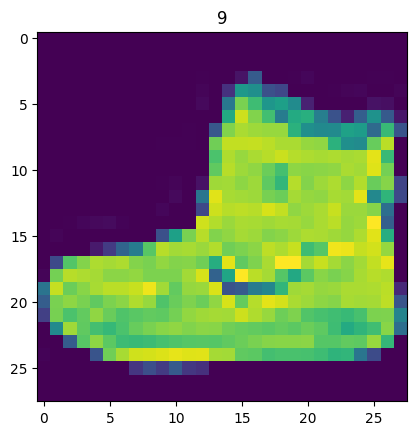

In [66]:
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze()) #it seems like that matplot dont take colour channel
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

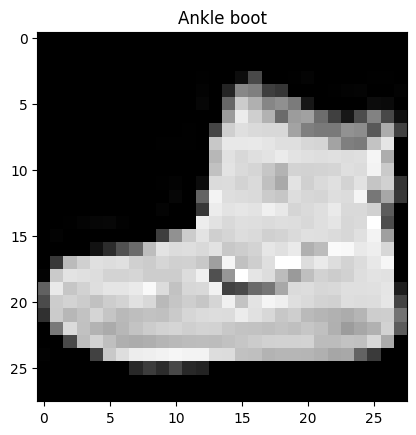

In [67]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_name[label])

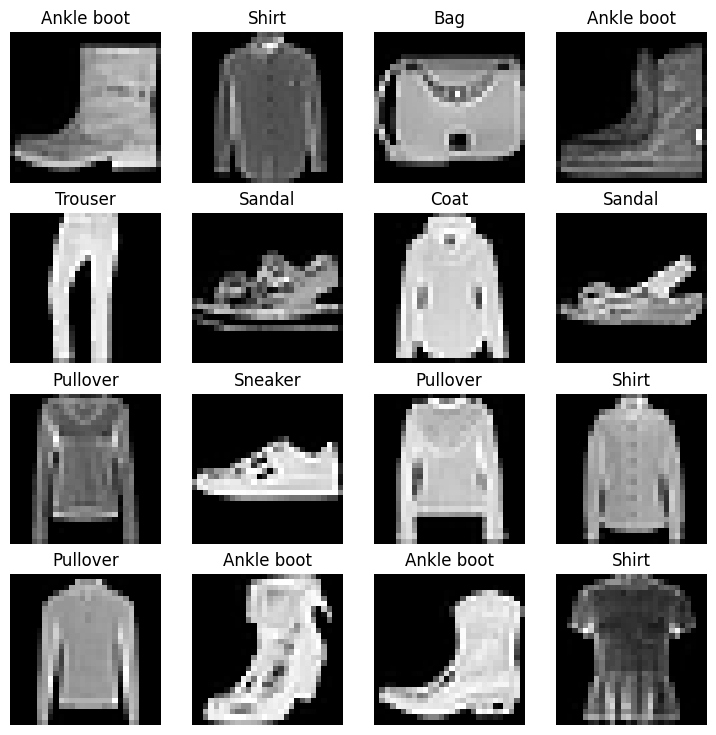

In [68]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_name[label])
  plt.axis(False);

In [69]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## prepare dataloder

In [70]:
from torch.utils.data import DataLoader

#setup batch size hyperparameter
BATCH_SIZE = 32

#turn dataset into dataloder aka iterables batches
train_dataloder = DataLoader(
    dataset= train_data,
    batch_size= BATCH_SIZE,
    shuffle= True
)

test_dataloder = DataLoader(
    dataset= test_data,
    batch_size= BATCH_SIZE,
    shuffle=False
)

train_dataloder, test_dataloder

(<torch.utils.data.dataloader.DataLoader at 0x7a2c4d67f490>,
 <torch.utils.data.dataloader.DataLoader at 0x7a2c4d67fa00>)

In [71]:
#check what inside the datloder
train_features_batch, train_label_batch = next(iter(train_dataloder))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Shirt')

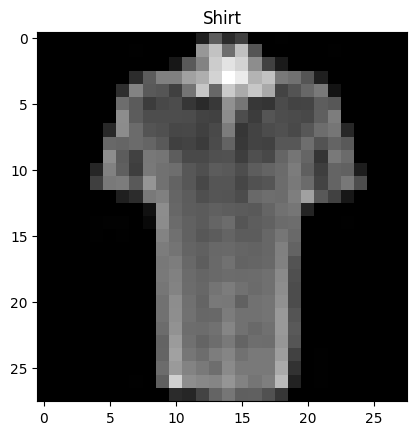

In [72]:
#show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_name[label])

## Building a baseline model

In [73]:
#create a flattern layer
flattern_model = nn.Flatten()

#got a single sample
x = train_features_batch[0]

#flattern the sample
output = flattern_model(x)

#print out what happen
print(f'x.Shape: {x.shape} [color_channel, height, width]')
print(f'output.Shape: {output.shape} [color_channel, height*width]')

x.Shape: torch.Size([1, 28, 28]) [color_channel, height, width]
output.Shape: torch.Size([1, 784]) [color_channel, height*width]


In [74]:
output.squeeze().shape

torch.Size([784])

In [75]:
from torch import nn

class FashionMNISTv0(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_unit: int
               ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features= hidden_unit),
        nn.Linear(in_features= hidden_unit, out_features= output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [76]:
len(class_name)

10

In [77]:
model_0 = FashionMNISTv0(
    input_shape= 28*28,
    output_shape=len(class_name),
    hidden_unit=10
).to('cpu')

model_0

FashionMNISTv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [78]:
dummy_x = torch.rand([1, 1, 28, 28])
a = model_0(dummy_x)
a1 = model_0(dummy_x).squeeze()
a, a.shape , a1.shape

(tensor([[ 0.4283,  0.1136, -0.3903, -0.0246, -0.0698,  0.2508,  0.4007, -0.4172,
          -0.0264, -0.2463]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]),
 torch.Size([10]))

In [79]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [80]:
#import accuray matrix
import helper_functions
from helper_functions import accuracy_fn

# loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.1
)

In [81]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  total_time = end - start
  print(f'Train time on {device}:{total_time:.3f} seconds')
  return total_time

In [82]:
start_time = timer()
2+31
end_time = timer()
print_train_time(start_time, end_time, device='cpu')

Train time on cpu:0.000 seconds


9.568299901729915e-05

In [83]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloder):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloder.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloder)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloder:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloder)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloder)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5948 | Test loss: 0.5164, Test acc: 81.8391
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4795 | Test loss: 0.4814, Test acc: 83.1769
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4570 | Test loss: 0.4777, Test acc: 83.4964
Train time on cpu:68.180 seconds


In [84]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #predict
      y_pred = model(X)

      # accumulate loss and acc per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred= y_pred.argmax(dim=1))

    # average accumulate loss and acc for per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'Model Name:' : model.__class__.__name__, #only work when model is created with class
          'Model Loss:' : loss.item(),
          'Model Acc:' : acc
          }

In [85]:
model_0_result = eval_model(
    model= model_0,
    data_loader=test_dataloder,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_0_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name:': 'FashionMNISTv0',
 'Model Loss:': 0.4777320623397827,
 'Model Acc:': 83.49640575079871}

In [86]:
#just for fun to see tqdm in action
import time
for i in tqdm(range(20)):
  time.sleep(3)

  0%|          | 0/20 [00:00<?, ?it/s]

## set up gpu activation code model 1 start

In [87]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [88]:
from torch import nn

class FashionMNISTv1(nn.Module):
  def __init__(self,
               hidden_unit: int,
               input_shape: int,
               output_shape: int):
    super().__init__()

    self.stack_layer = nn.Sequential(
        nn.Flatten(), #flatten input into single vector
        nn.Linear(in_features= input_shape, out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features= hidden_unit, out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features= hidden_unit, out_features=output_shape)
    )

  def forward(self, x):
    return self.stack_layer(x)

In [89]:
model_1 = FashionMNISTv1(
    hidden_unit=10,
    input_shape=28*28,
    output_shape=len(class_name)
).to(device)

model_1

FashionMNISTv1(
  (stack_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [90]:
# loss and acc fn
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params= model_1.parameters(),
    lr=0.1
)

## functionizing training and testing loop

In [91]:
#training loop
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device = device
               ):
  train_loss , train_acc = 0, 0
  model.train()

  for X, y in data_loader:
    #device
    X, y = X.to(device), y.to(device)
    #forward pass
    y_pred = model(X)

    #loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    #optimizer.zero_grad , backpropagation and optimizer.step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /=len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.3f}%')

In [92]:
### Testing

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device = device
              ):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloder)
    test_acc /= len(test_dataloder)
    print(f'Test loss: {test_loss:.5f} | Test acc: {test_acc:.3f}')

In [93]:
epochs = 3

# train_dataloader = train_dataloder.to(device)
# test_dataloder = test_dataloder.to(device)

torch.manual_seed(42)
train_time_start = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  #train step
  train_step(model= model_1,
             data_loader= train_dataloder,
             loss_fn=loss_fn,
             optimizer= optimizer,
             accuracy_fn= accuracy_fn,
             device = device
             )

  #test step
  test_step(model= model_1,
             data_loader= test_dataloder,
             loss_fn=loss_fn,
             optimizer= optimizer,
             accuracy_fn= accuracy_fn,
             device = device
             )
train_time_end = timer()
total_train_time_model_1 = print_train_time(start= train_time_start,
                                            end=train_time_end,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.70309 | Train acc: 73.970%
Test loss: 0.56939 | Test acc: 79.093
Epoch: 1
------
Train loss: 0.49384 | Train acc: 82.390%
Test loss: 0.51031 | Test acc: 81.330
Epoch: 2
------
Train loss: 0.45877 | Train acc: 83.625%
Test loss: 0.49232 | Test acc: 82.808
Train time on cpu:51.495 seconds


In [94]:
model_0_result

{'Model Name:': 'FashionMNISTv0',
 'Model Loss:': 0.4777320623397827,
 'Model Acc:': 83.49640575079871}

In [95]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device= device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # print(X.dtype)
      # y = torch.tensor(y).type(torch.int)
      # print(y)
      X, y = X.to(device) , y.to(device)
      #predict
      y_pred = model(X)

      # accumulate loss and acc per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred= y_pred.argmax(dim=1))

    # average accumulate loss and acc for per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'Model Name:' : model.__class__.__name__, #only work when model is created with class
          'Model Loss:' : loss.item(),
          'Model Acc:' : acc
          }

### If you end up here can you help me to solve below problem

model_1_result = eval_model(
    model= model_1,
    data_loader= test_data,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_1_result

## cnn start

 * check it out
 https://poloclub.github.io/cnn-explainer/

In [127]:
class FashionMNISTv2(nn.Module):
  def __init__(self, hidden_unit: int, input_shape: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels= output_shape,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_unit * 7 * 7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_2(self.conv_block_1(x))
    #print(f'last conv shape : {x.shape}')
    return self.classifier(x)

In [128]:
image.shape

torch.Size([1, 28, 28])

In [129]:
torch.manual_seed(42)
model_2 = FashionMNISTv2(
    input_shape= 1, #channels
    hidden_unit=10,
    output_shape= len(class_name)
).to(device)

In [130]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [131]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

## loss fn and optimizer

In [132]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr= 0.1)

In [144]:
#model_2.state_dict()

## taining and testing

In [134]:
torch.manual_seed(42)
epochs = 3

#time
train_time_start = timer()

for epoch in tqdm(range(epochs)):
  print(f'Epochs : {epoch} \n---------')
  train_step(model=model_2,
             data_loader=train_dataloder,
             loss_fn= loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloder,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end = timer()

total_time = print_train_time(start=train_time_start,
                              end=train_time_end,
                              device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epochs : 0 
---------
Train loss: 0.59518 | Train acc: 78.375%
Test loss: 0.39500 | Test acc: 85.992
Epochs : 1 
---------
Train loss: 0.36536 | Train acc: 86.902%
Test loss: 0.35244 | Test acc: 86.911
Epochs : 2 
---------
Train loss: 0.32588 | Train acc: 88.128%
Test loss: 0.32719 | Test acc: 88.069
Train time on cpu:166.810 seconds


In [135]:
model_2_result = eval_model(model=model_2,
                            data_loader=test_dataloder,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_2_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name:': 'FashionMNISTv2',
 'Model Loss:': 0.32718968391418457,
 'Model Acc:': 88.06908945686901}

In [136]:
model_0_result

{'Model Name:': 'FashionMNISTv0',
 'Model Loss:': 0.4777320623397827,
 'Model Acc:': 83.49640575079871}

In [137]:
import pandas as pd
compare_model = pd.DataFrame([model_0_result,
                              model_2_result])

compare_model

,Model Name:,Model Loss:,Model Acc:
0,FashionMNISTv0,0.477732,83.496406
1,FashionMNISTv2,0.327190,88.069089


In [138]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloder, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [139]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 44.0 MB/s eta 0:00:00
mlxtend version: 0.23.1


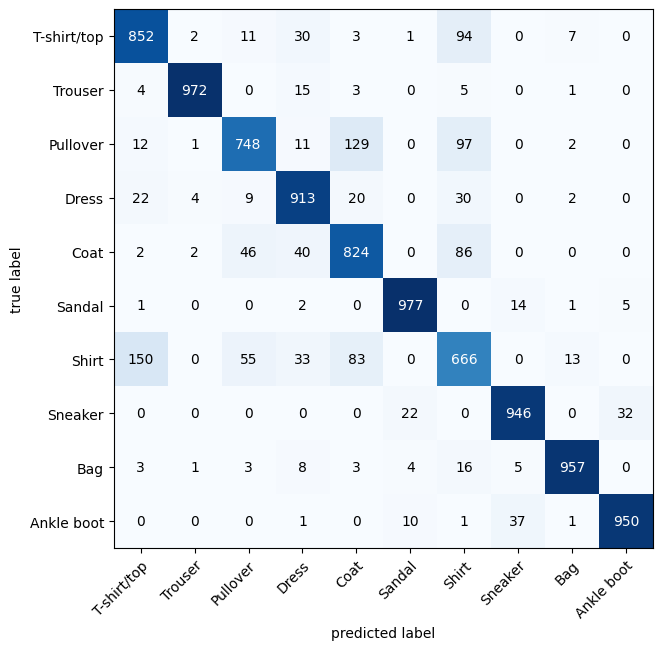

In [142]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_name), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_name, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [143]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [146]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTv2(input_shape=1,
                                    hidden_unit=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [148]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloder,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name:': 'FashionMNISTv2',
 'Model Loss:': 0.32718968391418457,
 'Model Acc:': 88.06908945686901}

In [150]:
model_2_result

{'Model Name:': 'FashionMNISTv2',
 'Model Loss:': 0.32718968391418457,
 'Model Acc:': 88.06908945686901}

# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_result["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance